<a href="https://colab.research.google.com/github/rutuja-patil24/CMPE-258-Deep_Learning/blob/main/Assignment_04/c)_Neural_Network_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## STEP 1: Imports

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## STEP 2: Generate Synthetic Non-Linear Data

In [2]:
def generate_data(n_samples=1000):
    X1 = np.random.uniform(-5, 5, n_samples)
    X2 = np.random.uniform(-5, 5, n_samples)
    X3 = np.random.uniform(-5, 5, n_samples)

    # Complex 3-variable non-linear function
    y = (2 * np.sin(X1) + 0.5 * X2**2 + 0.3 * X3**3 +
         np.cos(X1 * X2) + np.random.normal(0, 0.2, n_samples))

    X = np.column_stack((X1, X2, X3))
    return torch.FloatTensor(X), torch.FloatTensor(y.reshape(-1, 1))

X_train, y_train = generate_data()


##  STEP 3: 4D Data Visualization

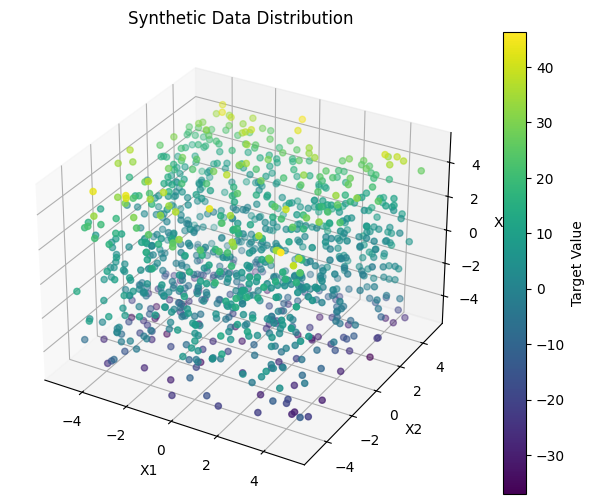

In [3]:
def plot_synthetic_data(X, y):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y.numpy(), cmap='viridis')
    plt.colorbar(scatter, label='Target Value')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('X3')
    ax.set_title('Synthetic Data Distribution')
    plt.show()

plot_synthetic_data(X_train, y_train)


## STEP 4: Manual 3-Layer Neural Network Class

In [4]:
class CustomNeuralNetwork:
    def __init__(self, input_size, hidden1_size, hidden2_size, output_size):
        self.W1 = torch.randn(input_size, hidden1_size) * np.sqrt(2.0 / input_size)
        self.b1 = torch.zeros(hidden1_size)

        self.W2 = torch.randn(hidden1_size, hidden2_size) * np.sqrt(2.0 / hidden1_size)
        self.b2 = torch.zeros(hidden2_size)

        self.W3 = torch.randn(hidden2_size, output_size) * np.sqrt(2.0 / hidden2_size)
        self.b3 = torch.zeros(output_size)

        # Enable autograd
        for param in [self.W1, self.b1, self.W2, self.b2, self.W3, self.b3]:
            param.requires_grad_()

    def relu(self, x):
        return torch.maximum(torch.tensor(0.0), x)

    def forward(self, x):
        self.z1 = torch.mm(x, self.W1) + self.b1
        self.a1 = self.relu(self.z1)

        self.z2 = torch.mm(self.a1, self.W2) + self.b2
        self.a2 = self.relu(self.z2)

        self.z3 = torch.mm(self.a2, self.W3) + self.b3
        return self.z3

    def get_params(self):
        return [self.W1, self.b1, self.W2, self.b2, self.W3, self.b3]

    def zero_grad(self):
        for param in self.get_params():
            if param.grad is not None:
                param.grad.zero_()


##  STEP 5: Train the Model

In [5]:
def train_model(model, X_train, y_train, learning_rate=0.01, epochs=1000):
    losses = []

    for epoch in range(epochs):
        y_pred = model.forward(X_train)
        loss = torch.mean((y_pred - y_train) ** 2)
        losses.append(loss.item())

        model.zero_grad()
        loss.backward()

        with torch.no_grad():
            for param in model.get_params():
                param -= learning_rate * param.grad

        if epoch % 50 == 0 or epoch < 5:
            print(f'Epoch {epoch}, Loss: {loss.item():.4f}')

    return losses

# Instantiate model and train
model = CustomNeuralNetwork(input_size=3, hidden1_size=64, hidden2_size=32, output_size=1)
losses = train_model(model, X_train, y_train)


Epoch 0, Loss: 241.2595
Epoch 1, Loss: 1610.0012
Epoch 2, Loss: 5181.1943
Epoch 3, Loss: 229.1137
Epoch 4, Loss: 161.4948
Epoch 50, Loss: 99.0664
Epoch 100, Loss: 137.7804
Epoch 150, Loss: 133.3020
Epoch 200, Loss: 165.8407
Epoch 250, Loss: 162.7815
Epoch 300, Loss: 66.7224
Epoch 350, Loss: 47.7386
Epoch 400, Loss: 44.4493
Epoch 450, Loss: 31.9933
Epoch 500, Loss: 34.8432
Epoch 550, Loss: 29.9255
Epoch 600, Loss: 29.3082
Epoch 650, Loss: 20.8555
Epoch 700, Loss: 47.2252
Epoch 750, Loss: 56.0538
Epoch 800, Loss: 116.9764
Epoch 850, Loss: 113.8507
Epoch 900, Loss: 35.3749
Epoch 950, Loss: 31.2005


## STEP 6: Plot Training Loss

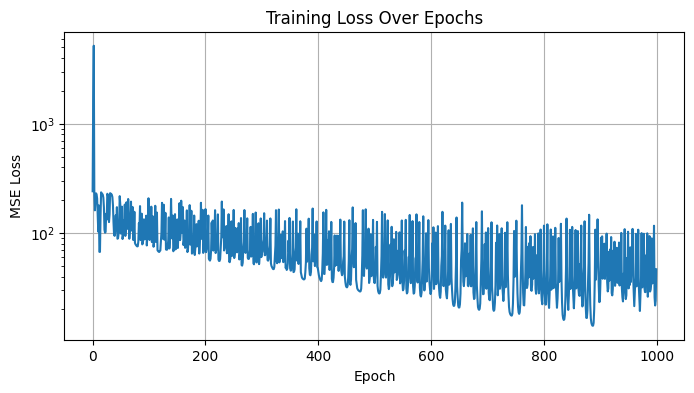

In [6]:
def plot_training_loss(losses):
    plt.figure(figsize=(8, 4))
    plt.plot(losses)
    plt.title('Training Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('MSE Loss')
    plt.yscale('log')
    plt.grid(True)
    plt.show()

plot_training_loss(losses)


## STEP 7: Plot 4D Prediction (on Training Data)

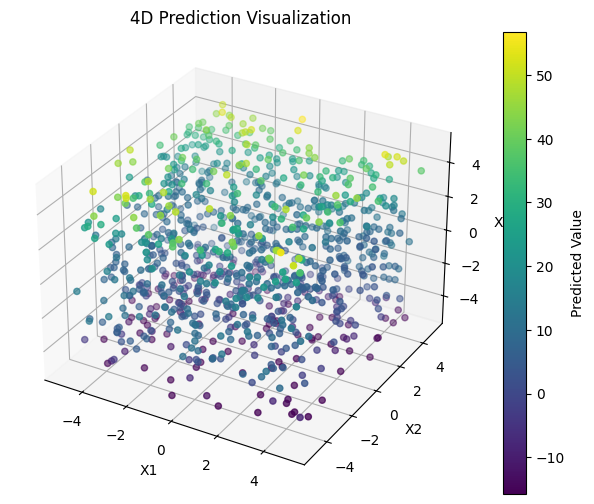

In [7]:
def plot_4d_scatter(model, X_train):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    with torch.no_grad():
        y_pred = model.forward(X_train)
    scatter = ax.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2], c=y_pred.numpy(), cmap='viridis')
    plt.colorbar(scatter, label='Predicted Value')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('X3')
    ax.set_title('4D Prediction Visualization')
    plt.show()

plot_4d_scatter(model, X_train)


##  STEP 8: Actual vs Predicted Plot

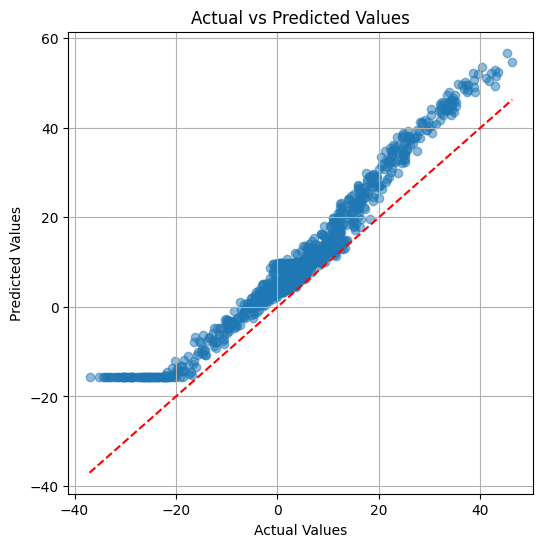

In [8]:
def plot_actual_vs_predicted(y_true, y_pred):
    plt.figure(figsize=(6, 6))
    plt.scatter(y_true.numpy(), y_pred.numpy(), alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs Predicted Values')
    plt.grid(True)
    plt.show()

with torch.no_grad():
    y_pred = model.forward(X_train)
plot_actual_vs_predicted(y_train, y_pred)


## STEP 9: Predict on Custom Test Points

In [9]:
def test_model(model, x1, x2, x3):
    with torch.no_grad():
        x_tensor = torch.FloatTensor([[x1, x2, x3]])
        prediction = model.forward(x_tensor)
        return prediction.item()

test_points = [(-4, -4, -4), (-2, -2, -2), (0, 0, 0), (2, 2, 2), (4, 4, 4)]
print("\nTest Predictions:")
for x1, x2, x3 in test_points:
    pred = test_model(model, x1, x2, x3)
    actual = 2 * np.sin(x1) + 0.5 * x2**2 + 0.3 * x3**3 + np.cos(x1 * x2)
    print(f"Input: ({x1}, {x2}, {x3})")
    print(f"Prediction: {pred:.3f}")
    print(f"Actual: {actual:.3f}\n")



Test Predictions:
Input: (-4, -4, -4)
Prediction: -5.846
Actual: -10.644

Input: (-2, -2, -2)
Prediction: 3.364
Actual: -2.872

Input: (0, 0, 0)
Prediction: 7.283
Actual: 1.000

Input: (2, 2, 2)
Prediction: 9.766
Actual: 5.565

Input: (4, 4, 4)
Prediction: 39.002
Actual: 24.729

